#### 3. Problema: Generación de datos sintéticos para la relación entre inversión publicitaria y ventas

Imaginen que son ingenieros de datos en una empresa de investigación de mercado. Han recopilado información sobre la relación entre la inversión publicitaria (x) y las ventas de un producto (y). Sin embargo, saben que en el mundo real, las relaciones entre variables a menudo están sujetas a variaciones y ruido. Para tener en cuenta esta variabilidad, necesitan generar un conjunto de datos sintéticos más grande con ruido para simular un escenario más realista.

**Pasos:**

a) **Generación de Datos**:

- Utilicen una función para generar 500 valores de X de manera uniforme (todos los eventos posibles son igualmente probables) entre 50 y 100.
- Utilicen la relación lineal y = 1.4x + ϵ, donde ϵ es un término de error que representa el ruido. Agreguen este término de error para cada valor de X para introducir variabilidad en la relación.

b) **Exploración de Datos**:

- Visualicen los datos generados en un gráfico de dispersión (scatter plot) para comprender la relación entre x y y.

c) **Aplicación de Regresión Lineal**:

- Utilicen el método de los mínimos cuadrados para la regresión lineal simple que ajuste un modelo a estos datos. Grafiquen la recta junto con el diagrama de dispersión.
- Calculen los coeficientes de correlación y de determinación para evaluar la calidad del modelo. Interpreten los resultados. ¿Cómo describen la fuerza de la relación entre y y x?
- Construyan una tabla ANOVA para la regresión lineal.

d) **Intervalos de Confianza y Pruebas de Hipótesis**:

- Construyan intervalos de confianza de 95 % para los coeficientes de la regresión (pendiente e intercepto).
- Interpreten los intervalos de confianza. ¿Qué información proporcionan sobre la estimación de los coeficientes?
- Realicen pruebas de hipótesis para verificar si los coeficientes son estadísticamente significativos.

In [1]:
#Librerias:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
#Generación de Datos

# Fijar la semilla para reproducibilidad
np.random.seed(42)

# Generar 500 valores de Advertising_Investment de manera uniforme entre 50 y 100
Advertising_Investment = np.random.uniform(50, 100, 500)

# Generar el término de error epsilon (ruido) con media 0 y desviación estándar 10
epsilon = np.random.normal(0, 10, 500)

# Generar los valores de Sales utilizando la relación Sales = 1.4 * Advertising_Investment + epsilon
Sales = 1.4 * Advertising_Investment + epsilon

# Crear un DataFrame con los datos generados
data = pd.DataFrame({'Advertising_Investment': Advertising_Investment, 'Sales': Sales})

#data.to_csv('../data/rawdata/question3.csv', index=False)
# Mostrar las primeras filas del DataFrame
print(tabulate(data.head(), headers='keys', tablefmt='psql'))


+----+--------------------------+----------+
|    |   Advertising_Investment |    Sales |
|----+--------------------------+----------|
|  0 |                  68.727  |  99.6354 |
|  1 |                  97.5357 | 155.312  |
|  2 |                  86.5997 | 130.744  |
|  3 |                  79.9329 | 106.137  |
|  4 |                  57.8009 |  71.9372 |
+----+--------------------------+----------+


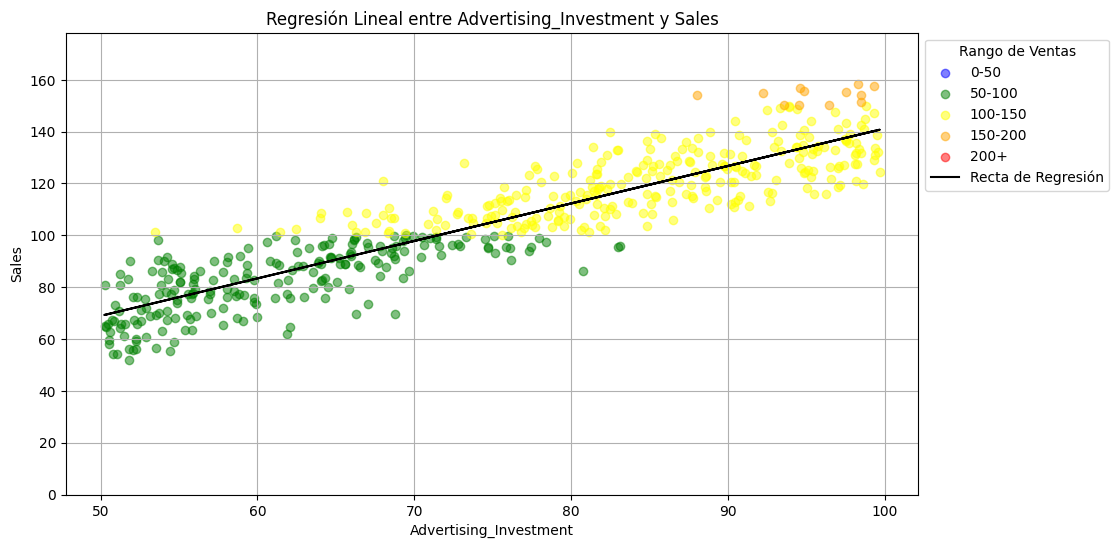

Intercepto: -3.370562694083759
Pendiente: 1.4460009245782883
Coeficiente de Determinación (R^2): 0.8220590554973619
Coeficiente de Correlación: 0.9066747241968102
Tabla ANOVA para la Regresión Lineal:
+----+-----------------------+---------------------+----------------------+-------------------------+-------------------+
|    | Fuente de Variación   |   Suma de Cuadrados |   Grados de Libertad | Promedio de Cuadrados   | Estadístico F     |
+====+=======================+=====================+======================+=========================+===================+
|  0 | Regresión             |            232710   |                    1 | 232709.67144348542      | 2300.681334371678 |
+----+-----------------------+---------------------+----------------------+-------------------------+-------------------+
|  1 | Residual              |             50371.8 |                  498 | 101.1481546648176       |                   |
+----+-----------------------+---------------------+---------------

In [5]:
#Aplicación de Regresión Lineal

# Cargar los datos
df = pd.read_csv("../data/cleandata/question3.csv")

# Definir las columnas
x_column = "Advertising_Investment"
y_column = "Sales"

# Definir los intervalos (bins) y colores
bins = [0, 50, 100, 150, 200, np.inf]
colors = ['blue', 'green', 'yellow', 'orange', 'red']
labels = ['0-50', '50-100', '100-150', '150-200', '200+']

def scatter_plot_with_regression(df, x_column, y_column, bins, colors, labels):
    # Asignar colores según el rango de ventas
    df['Color'] = pd.cut(df[y_column], bins=bins, labels=colors)

    # Gráfico de dispersión
    plt.figure(figsize=(11, 6))
    for color, label in zip(colors, labels):
        subset = df[df['Color'] == color]
        plt.scatter(subset[x_column], subset[y_column], alpha=0.5, label=label, color=color)

    # Ajustar el modelo de regresión lineal
    x = df[[x_column]]
    y = df[y_column]
    model = LinearRegression()
    model.fit(x, y)

    # Predicciones y cálculo de coeficientes
    df['Sales_Pred'] = model.predict(x)
    intercept = model.intercept_
    slope = model.coef_[0]
    r_squared = r2_score(y, df['Sales_Pred'])

    # Gráfico de la recta de regresión
    plt.plot(df[x_column], df['Sales_Pred'], color='black', label='Recta de Regresión')
    plt.title(f'Regresión Lineal entre {x_column} y {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.ylim(0, df[y_column].max() + 20)
    plt.legend(title='Rango de Ventas', loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()

    # Imprimir coeficientes y R^2
    print(f"Intercepto: {intercept}")
    print(f"Pendiente: {slope}")
    print(f"Coeficiente de Determinación (R^2): {r_squared}")

    # Calcular coeficiente de correlación
    correlation_coef = np.corrcoef(df[x_column], df[y_column])[0, 1]
    print(f"Coeficiente de Correlación: {correlation_coef}")

    return model, intercept, slope, r_squared

# Llamar a la función
model, intercept, slope, r_squared = scatter_plot_with_regression(df, x_column, y_column, bins, colors, labels)

def anova_table(model, df, x_column, y_column):
    # Número de observaciones y parámetros
    n = len(df)
    p = 1  # Solo un predictor

    # Suma de cuadrados total
    ss_total = np.sum((df[y_column] - np.mean(df[y_column]))**2)
    
    # Suma de cuadrados de regresión
    ss_regression = np.sum((df['Sales_Pred'] - np.mean(df[y_column]))**2)
    
    # Suma de cuadrados residual (errores)
    ss_residual = np.sum((df[y_column] - df['Sales_Pred'])**2)

    # Grados de libertad
    df_total = n - 1
    df_regression = p
    df_residual = n - p - 1

    # Promedio de cuadrados
    ms_regression = ss_regression / df_regression
    ms_residual = ss_residual / df_residual

    # Estadístico F
    f_value = ms_regression / ms_residual

    # Tabla ANOVA
    anova_table = {
        'Fuente de Variación': ['Regresión', 'Residual', 'Total'],
        'Suma de Cuadrados': [ss_regression, ss_residual, ss_total],
        'Grados de Libertad': [df_regression, df_residual, df_total],
        'Promedio de Cuadrados': [ms_regression, ms_residual, ''],
        'Estadístico F': [f_value, '', '']
    }

    # Convertir la tabla en un DataFrame para formatearla con tabulate
    anova_df = pd.DataFrame(anova_table)

    print("Tabla ANOVA para la Regresión Lineal:")
    print(tabulate(anova_df, headers='keys', tablefmt='grid'))

    # Explicación detallada
    explanation = """
    Tabla ANOVA (Análisis de Varianza) para la Regresión Lineal:
    ------------------------------------------------------------
    - Suma de Cuadrados (SS): Medida de la variabilidad total en los datos.
      - SS Total: Variabilidad total en las ventas.
      - SS Regresión: Variabilidad explicada por el modelo de regresión.
      - SS Residual: Variabilidad no explicada por el modelo (errores).
    
    - Grados de Libertad (DF): Cantidad de información utilizada para estimar una suma de cuadrados.
      - DF Total: Número de observaciones menos uno.
      - DF Regresión: Número de predictores (en este caso, 1).
      - DF Residual: Observaciones menos parámetros del modelo menos uno.
    
    - Promedio de Cuadrados (MS): Suma de cuadrados dividida por sus respectivos grados de libertad.
      - MS Regresión: Variabilidad media explicada por el modelo.
      - MS Residual: Variabilidad media no explicada por el modelo.
    
    - Estadístico F: Relación entre MS Regresión y MS Residual. Indica si el modelo de regresión es significativo.
    
    En este análisis, el coeficiente de determinación (R^2) indica la proporción de la variabilidad en las ventas que se puede explicar por la inversión en publicidad. Un valor cercano a 1 sugiere una relación fuerte, mientras que un valor cercano a 0 sugiere una relación débil.
    
    El coeficiente de correlación mide la fuerza y la dirección de la relación lineal entre dos variables. Un valor positivo indica una relación directa, mientras que un valor negativo indica una relación inversa.
    """
    
    print(explanation)

# Llamar a la función ANOVA
anova_table(model, df, x_column, y_column)



In [6]:
#Intervalos de Confianza y Pruebas de Hipótesis

# Cargar los datos
df = pd.read_csv("../data/cleandata/question3.csv")
x_column = "Advertising_Investment"
y_column = "Sales"

def confidence_intervals_and_hypothesis_tests(df, x_column, y_column):
    # Preparar los datos para statsmodels
    X = sm.add_constant(df[x_column])  # Agregar una constante para el intercepto
    y = df[y_column]

    # Ajustar el modelo de regresión
    model = sm.OLS(y, X).fit()

    # Obtener los coeficientes y sus errores estándar
    intercept, slope = model.params
    intercept_se, slope_se = model.bse

    # Grados de libertad residuales
    df_residual = model.df_resid

    # Intervalos de confianza del 95%
    t_value = stats.t.ppf(1 - 0.025, df_residual)  # Valor crítico t para el 95% de confianza

    intercept_ci = (intercept - t_value * intercept_se, intercept + t_value * intercept_se)
    slope_ci = (slope - t_value * slope_se, slope + t_value * slope_se)

    print("Intervalos de Confianza del 95%:")
    print(f"Intercepto: {intercept_ci}")
    print(f"Pendiente: {slope_ci}")

    # Explicación de los Intervalos de Confianza
    print("\nInterpretación de los Intervalos de Confianza:")
    print(f"El intervalo de confianza del 95% para el intercepto es {intercept_ci},")
    print("lo que significa que estamos 95% seguros de que el verdadero valor del intercepto se encuentra dentro de este rango.")
    print(f"El intervalo de confianza del 95% para la pendiente es {slope_ci},")
    print("lo que significa que estamos 95% seguros de que el verdadero valor de la pendiente se encuentra dentro de este rango.")

    # Pruebas de Hipótesis
    print("\nPruebas de Hipótesis:")
    summary = model.summary2().tables[1]
    p_values = summary['P>|t|']
    
    for param, p_value in p_values.items():
        if p_value < 0.05:
            print(f"Coeficiente {param}: p-value = {p_value:.4f} -> Rechazamos H0 (significativo)")
        else:
            print(f"Coeficiente {param}: p-value = {p_value:.4f} -> No rechazamos H0 (no significativo)")

    # Explicación de las Pruebas de Hipótesis
    print("\nInterpretación de las Pruebas de Hipótesis:")
    print("Hipótesis nula (H0): El coeficiente es igual a cero (no hay efecto).")
    print("Hipótesis alternativa (H1): El coeficiente es diferente de cero (hay efecto).")
    print("Evaluación:")
    print("Si el valor p es menor a 0.05, rechazamos la hipótesis nula y concluimos que el coeficiente es significativo.")
    print("Si el valor p es mayor o igual a 0.05, no rechazamos la hipótesis nula y concluimos que el coeficiente no es significativo.")

    return model, intercept, slope, intercept_ci, slope_ci, summary

# Llamar a la función
model, intercept, slope, intercept_ci, slope_ci, summary = confidence_intervals_and_hypothesis_tests(df, x_column, y_column)

Intervalos de Confianza del 95%:
Intercepto: (-7.895712215170186, 1.1545868270026203)
Pendiente: (1.3867704519183974, 1.5052313972381797)

Interpretación de los Intervalos de Confianza:
El intervalo de confianza del 95% para el intercepto es (-7.895712215170186, 1.1545868270026203),
lo que significa que estamos 95% seguros de que el verdadero valor del intercepto se encuentra dentro de este rango.
El intervalo de confianza del 95% para la pendiente es (1.3867704519183974, 1.5052313972381797),
lo que significa que estamos 95% seguros de que el verdadero valor de la pendiente se encuentra dentro de este rango.

Pruebas de Hipótesis:
Coeficiente const: p-value = 0.1440 -> No rechazamos H0 (no significativo)
Coeficiente Advertising_Investment: p-value = 0.0000 -> Rechazamos H0 (significativo)

Interpretación de las Pruebas de Hipótesis:
Hipótesis nula (H0): El coeficiente es igual a cero (no hay efecto).
Hipótesis alternativa (H1): El coeficiente es diferente de cero (hay efecto).
Evaluaci